# KNN Investigation
- In this project, I utilize pandas, matplotlib and sklearn to create a custom "k-nearest neighbours" classifier.
- I split data into train and test data to enable me to validate the accuracy of my model.
- I perform cross-validation using sklearn's cross validation tool, and graph the k-values relative to the accuracy score.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Using pandas to read in knn-dataset inputs

test_inputs = pd.read_csv("/Users/base/Desktop/knn-dataset/test_inputs.csv")
test_labels = pd.read_csv("/Users/base/Desktop/knn-dataset/test_labels.csv")
train_inputs = pd.read_csv("/Users/base/Desktop/knn-dataset/train_inputs.csv")
train_labels = pd.read_csv("/Users/base/Desktop/knn-dataset/train_labels.csv")

## Pre-Implementation Code
- I wanted to make sure I had a strong understand of the underlying algorithim before implementing the class for the knn-classifier.
- I performed some basic data analysis and implemented the algorithim, which could later be retrofited into the class.

In [2]:

def dist(train_data, test_data):
    return np.linalg.norm(np.array(train_data) - np.array(test_data), axis=1)

train_data = train_inputs.values
test_data = test_inputs.values

distances = np.zeros((len(test_data), len(train_data)))

for i in range(len(test_data)):
    distances[i, :] = np.linalg.norm(train_data - test_data[i, :], axis=1)
print(train_data)

results = {}
for i in range(0, len(test_data)):
    sorted_indices = np.argsort(distances[i])
    print("For "+str(i)+ " point")
    
    # majority vote
    five_vote = 0
    six_vote = 0
    k = 3
    sorted_indices = sorted_indices[0:k]
    print(sorted_indices)
    for j in range(0, k):
        
        # pull out classification, add it to votes
        classification = train_labels.iloc[sorted_indices[j], 0]
        
       # allocate the votes to the appropriate variable
        if classification == 6:
            six_vote += 1
        elif classification == 5:
            five_vote += 1
    
   
    # classify test data set
    if six_vote > five_vote:
        print("Classified as 6 ")
        results[i] = 6
    else:
        print("Classified as 5")
        results[i] = 5

[[ 0.  0.  9. ...  4.  0. 14.]
 [10. 15. 16. ... 14. 16.  1.]
 [ 1.  2.  0. ...  0.  2.  0.]
 ...
 [ 5.  2.  0. ...  1.  4.  4.]
 [ 0.  0.  5. ...  0.  4.  2.]
 [ 0.  0.  2. ...  0.  2.  0.]]
For 0 point
[656  48  78]
Classified as 6 
For 1 point
[523  80 426]
Classified as 5
For 2 point
[472 962 194]
Classified as 6 
For 3 point
[175 401 836]
Classified as 6 
For 4 point
[276 780 124]
Classified as 6 
For 5 point
[721 247 707]
Classified as 5
For 6 point
[376 289 330]
Classified as 5
For 7 point
[214 819 258]
Classified as 5
For 8 point
[175  46 706]
Classified as 6 
For 9 point
[913 703 615]
Classified as 6 
For 10 point
[843   5 774]
Classified as 6 
For 11 point
[ 68 124 324]
Classified as 6 
For 12 point
[652 967 173]
Classified as 6 
For 13 point
[755  77  46]
Classified as 6 
For 14 point
[729 418 455]
Classified as 6 
For 15 point
[156 765 340]
Classified as 6 
For 16 point
[ 27 669 247]
Classified as 5
For 17 point
[437 665 443]
Classified as 5
For 18 point
[795  10 297]
Class

# Final Implementation
- Great, now I have an solid understanding of the implementation, let's integrate it into the sklearn library and use their tools

The Best K-Value is 16 with an accuracy of 0.5754594594594594


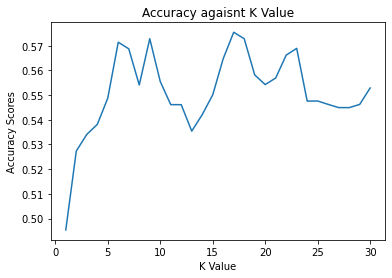

In [3]:
from sklearn.base import BaseEstimator, ClassifierMixin
# Implement the custom classifier
class KNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.train_data = X
        self.train_labels = y
     
        return self

    def predict(self, X):
        results = []
        for i in range(len(X)):
            # Calculate the distances between test and train data
            distances = np.linalg.norm(self.train_data - X[i, :], axis=1)
            
            # Sorted based on distances values
            sorted_indices = np.argsort(distances)
           

            sorted_indices = sorted_indices[0:k]
     
            # sum accordingly
            six_vote_count = np.sum(self.train_data[sorted_indices[:self.k]] == 6)
            five_vote_count = np.sum(self.train_data[sorted_indices[:self.k]] == 5)
            
            if six_vote_count > five_vote_count:
                results.append(6)
            else:
                results.append(5)
        return np.array(results)



from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

test_inputs = pd.read_csv("/Users/base/Desktop/knn-dataset/test_inputs.csv")
test_labels = pd.read_csv("/Users/base/Desktop/knn-dataset/test_labels.csv")
train_inputs = pd.read_csv("/Users/base/Desktop/knn-dataset/train_inputs.csv")
train_labels = pd.read_csv("/Users/base/Desktop/knn-dataset/train_labels.csv")
train_data = train_inputs.values
test_data = test_inputs.values


X_train, X_test, labels_train, labels_test = train_test_split(train_data, train_labels)


knn_classifier = KNNClassifier(k=3)
#  distances[i, :] = np.linalg.norm(train_data - test_data[i, :], axis=1)
knn_classifier.fit(train_data, train_labels)
predictions = knn_classifier.predict(train_data)

scoreArray = []
for k in range(1, 31):
    knn_classifier = KNNClassifier(k=k)
    scoreArray.append(np.mean(cross_val_score(knn_classifier, X_train, labels_train, cv=10, scoring='accuracy')))
    

plt.plot(range(1,31), scoreArray)
plt.title("Accuracy agaisnt K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy Scores")

maxAccuracy = np.max(scoreArray)
indexValue = scoreArray.index(maxAccuracy)
print("The Best K-Value is "+str(indexValue)+" with an accuracy of "+str(maxAccuracy))